<a href="https://colab.research.google.com/github/Nasriiin/Nasriiin/blob/main/Nasrin_Soleimani_Final_Project_Rossman_Sales_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting sales of Rossmann shops **

Introduction: Rossmann operates over 3,000 drug stores in 7 European countries.
Rossmann store managers are tasked with predicting their daily sales for up to six weeks
in advance.
Sales are influenced by many factors, including promotions, competition, school and
state holidays, seasonality, and locality.
Task: Predict the sales of Rossmann shops for 6 weeks in the future.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import datetime



In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
train.head(12)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
5,6,5,2015-07-31,5651,589,1,0,1
6,7,5,2015-07-31,15344,1414,1,0,1
7,8,5,2015-07-31,8492,833,1,0,1
8,9,5,2015-07-31,8565,687,1,0,1
9,10,5,2015-07-31,7185,681,1,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Open           844392 non-null  int64 
 6   Promo          844392 non-null  int64 
 7   StateHoliday   844392 non-null  object
 8   SchoolHoliday  844392 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 64.4+ MB


In [ ]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc47c95c950>,
      dtype=object)

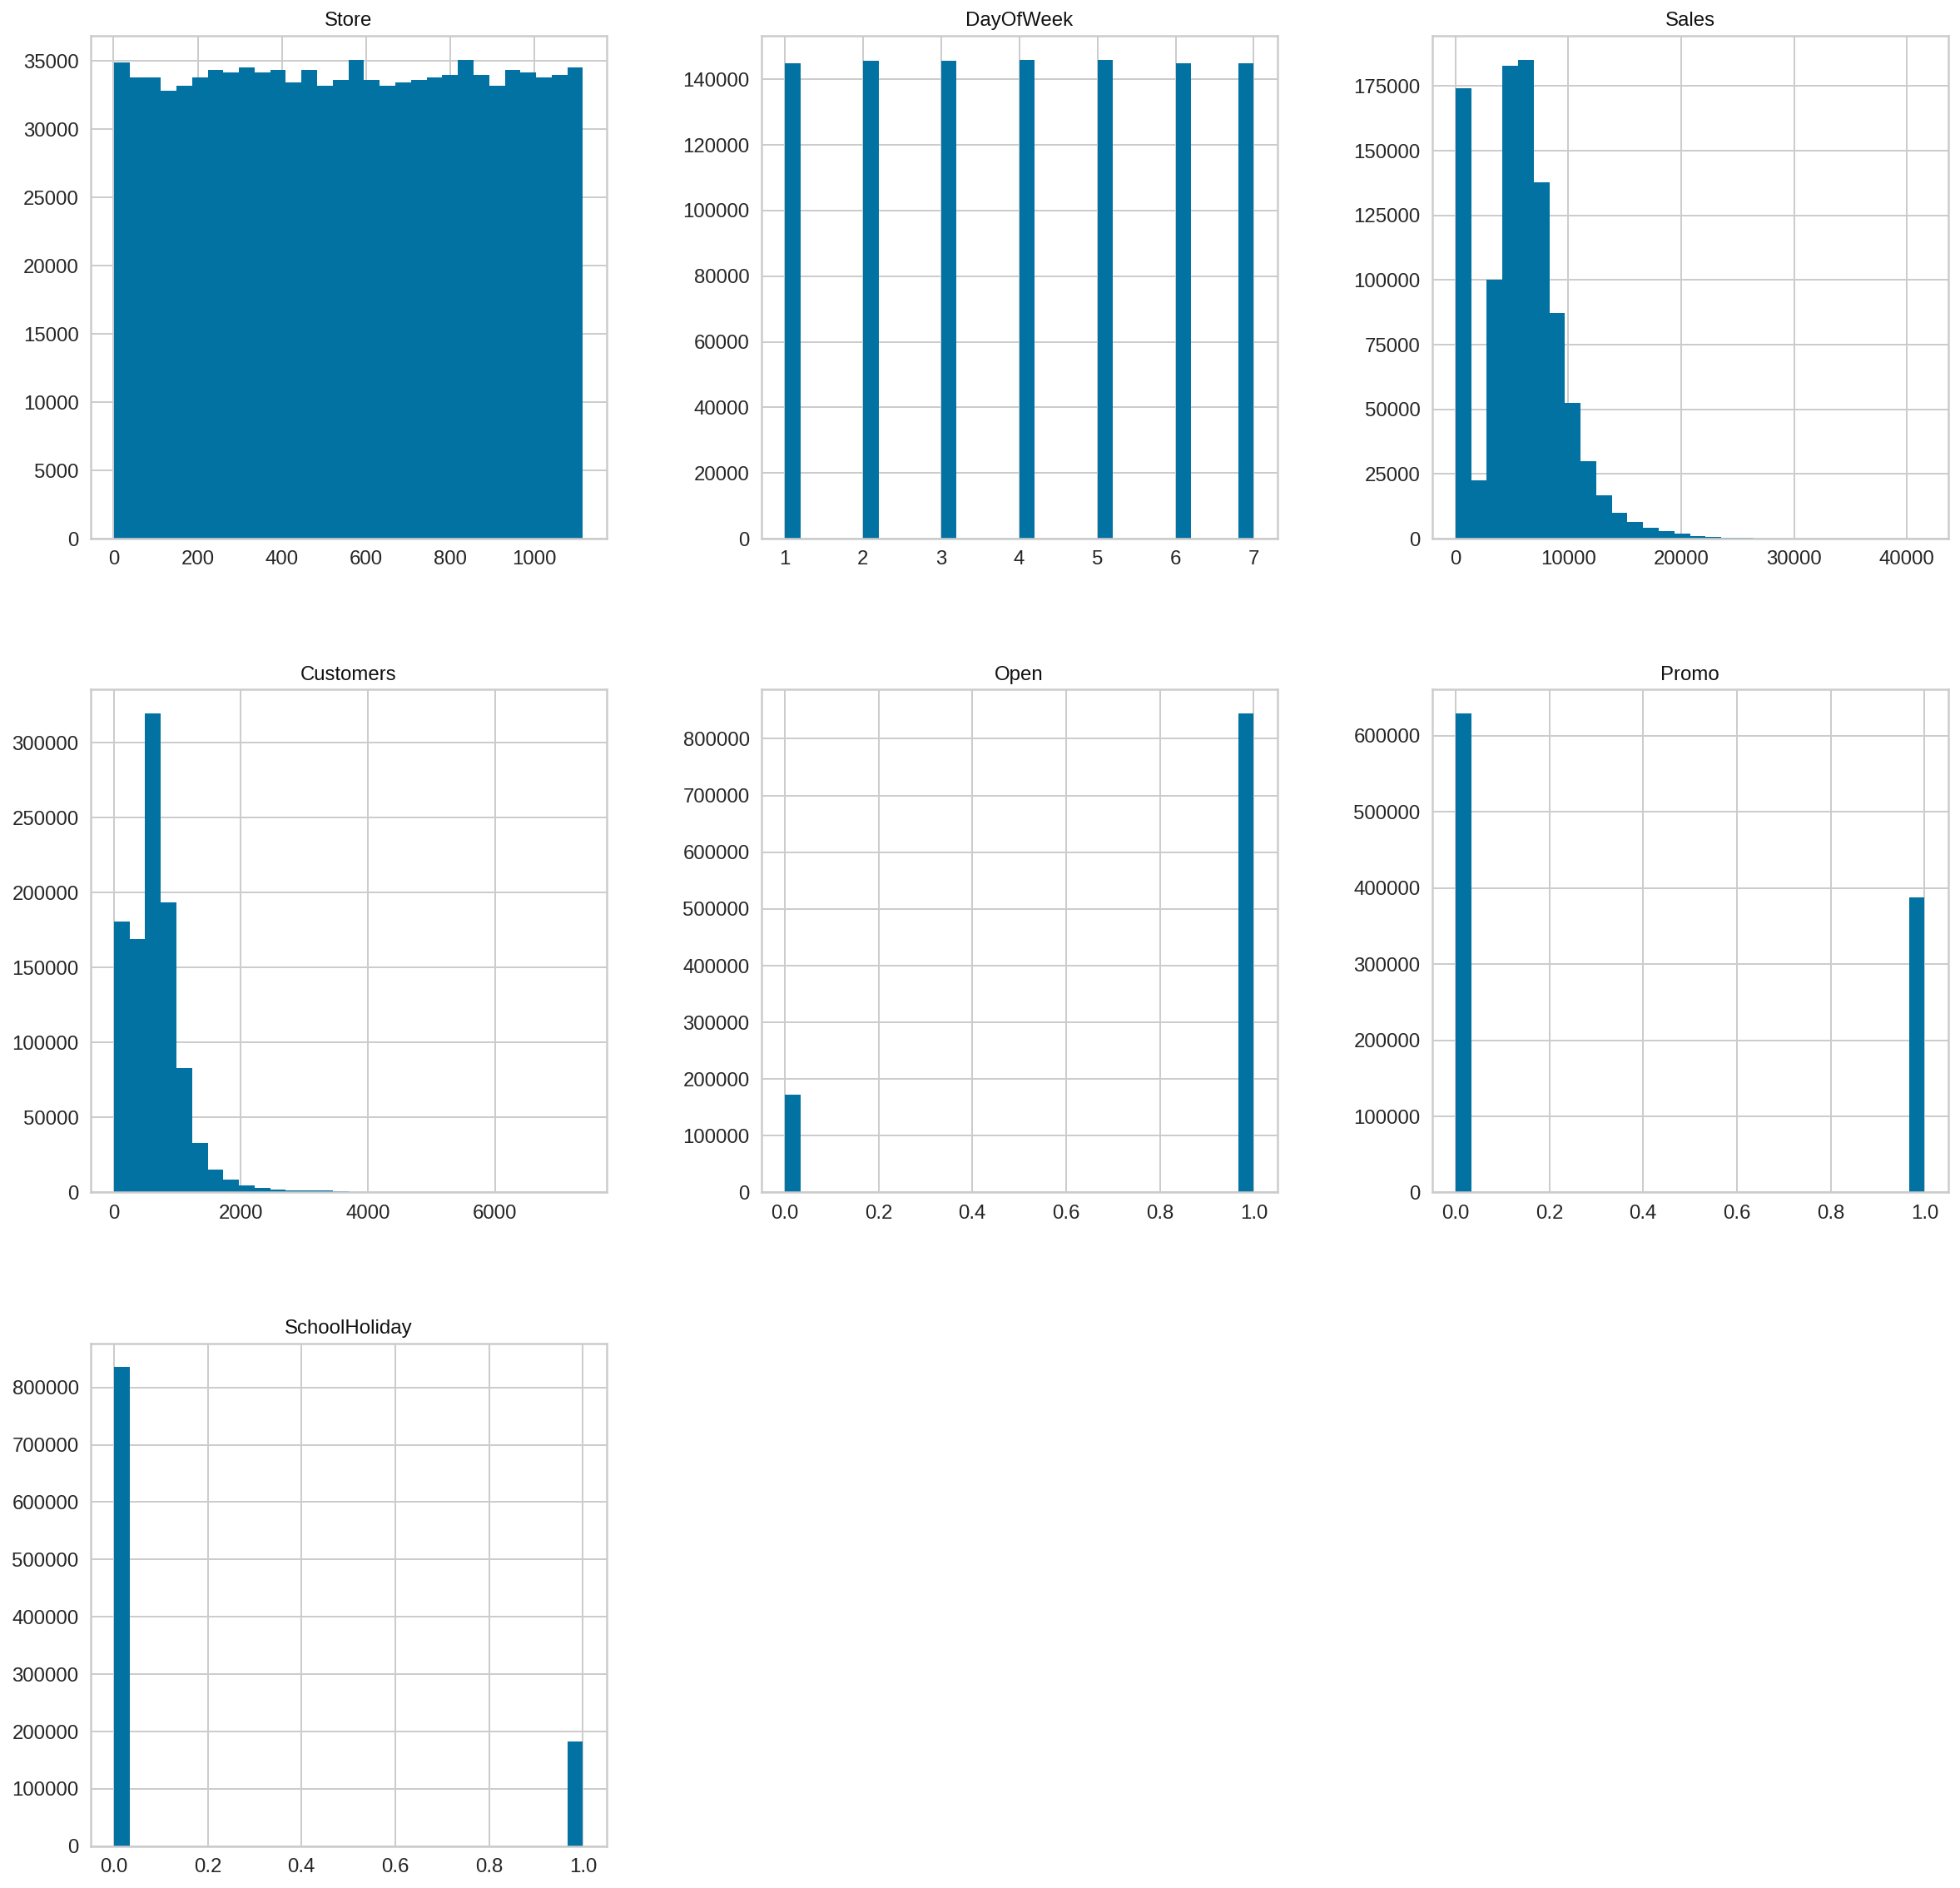

In [ ]:
train.hist(bins=30,figsize = (20,20))

In [ ]:
train['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [ ]:
train = train[train['Open']==1]

In [ ]:
train.drop(['Open'],axis=1,inplace=True)

In [ ]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00


In [ ]:
store = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/store.csv')

In [ ]:
store.head(15)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [ ]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
sns.heatmap(store.isnull(),yticklabels = False, cmap = 'Blues',cbar = False)

In [ ]:
store[store['CompetitionDistance'].isnull()]

In [ ]:
store[store['CompetitionOpenSinceMonth'].isnull()]

In [ ]:
store[store['CompetitionOpenSinceYear'].isnull()]

In [ ]:
null_columns = ['Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

In [ ]:
for i in null_columns:
    store[i].fillna(0,inplace=True)
    

In [ ]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(),inplace=True)

UsageError: Unknown variable '[CompetitionDistance].fillna(store[CompetitionDistance].mean(),inplace=True)'


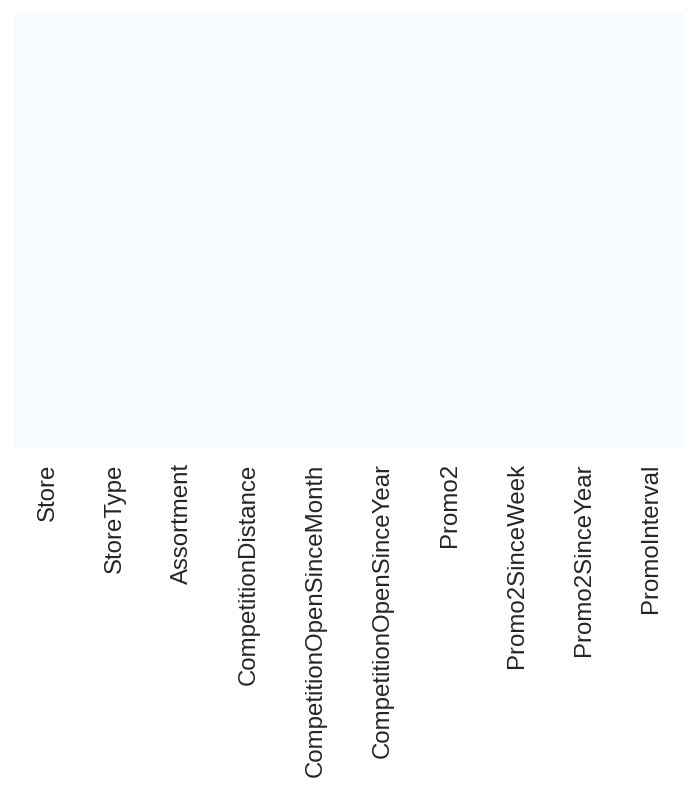

In [ ]:
sns.heatmap(store.isnull(),yticklabels = False, cmap = 'Blues',cbar = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc47adee490>,
      dtype=object)

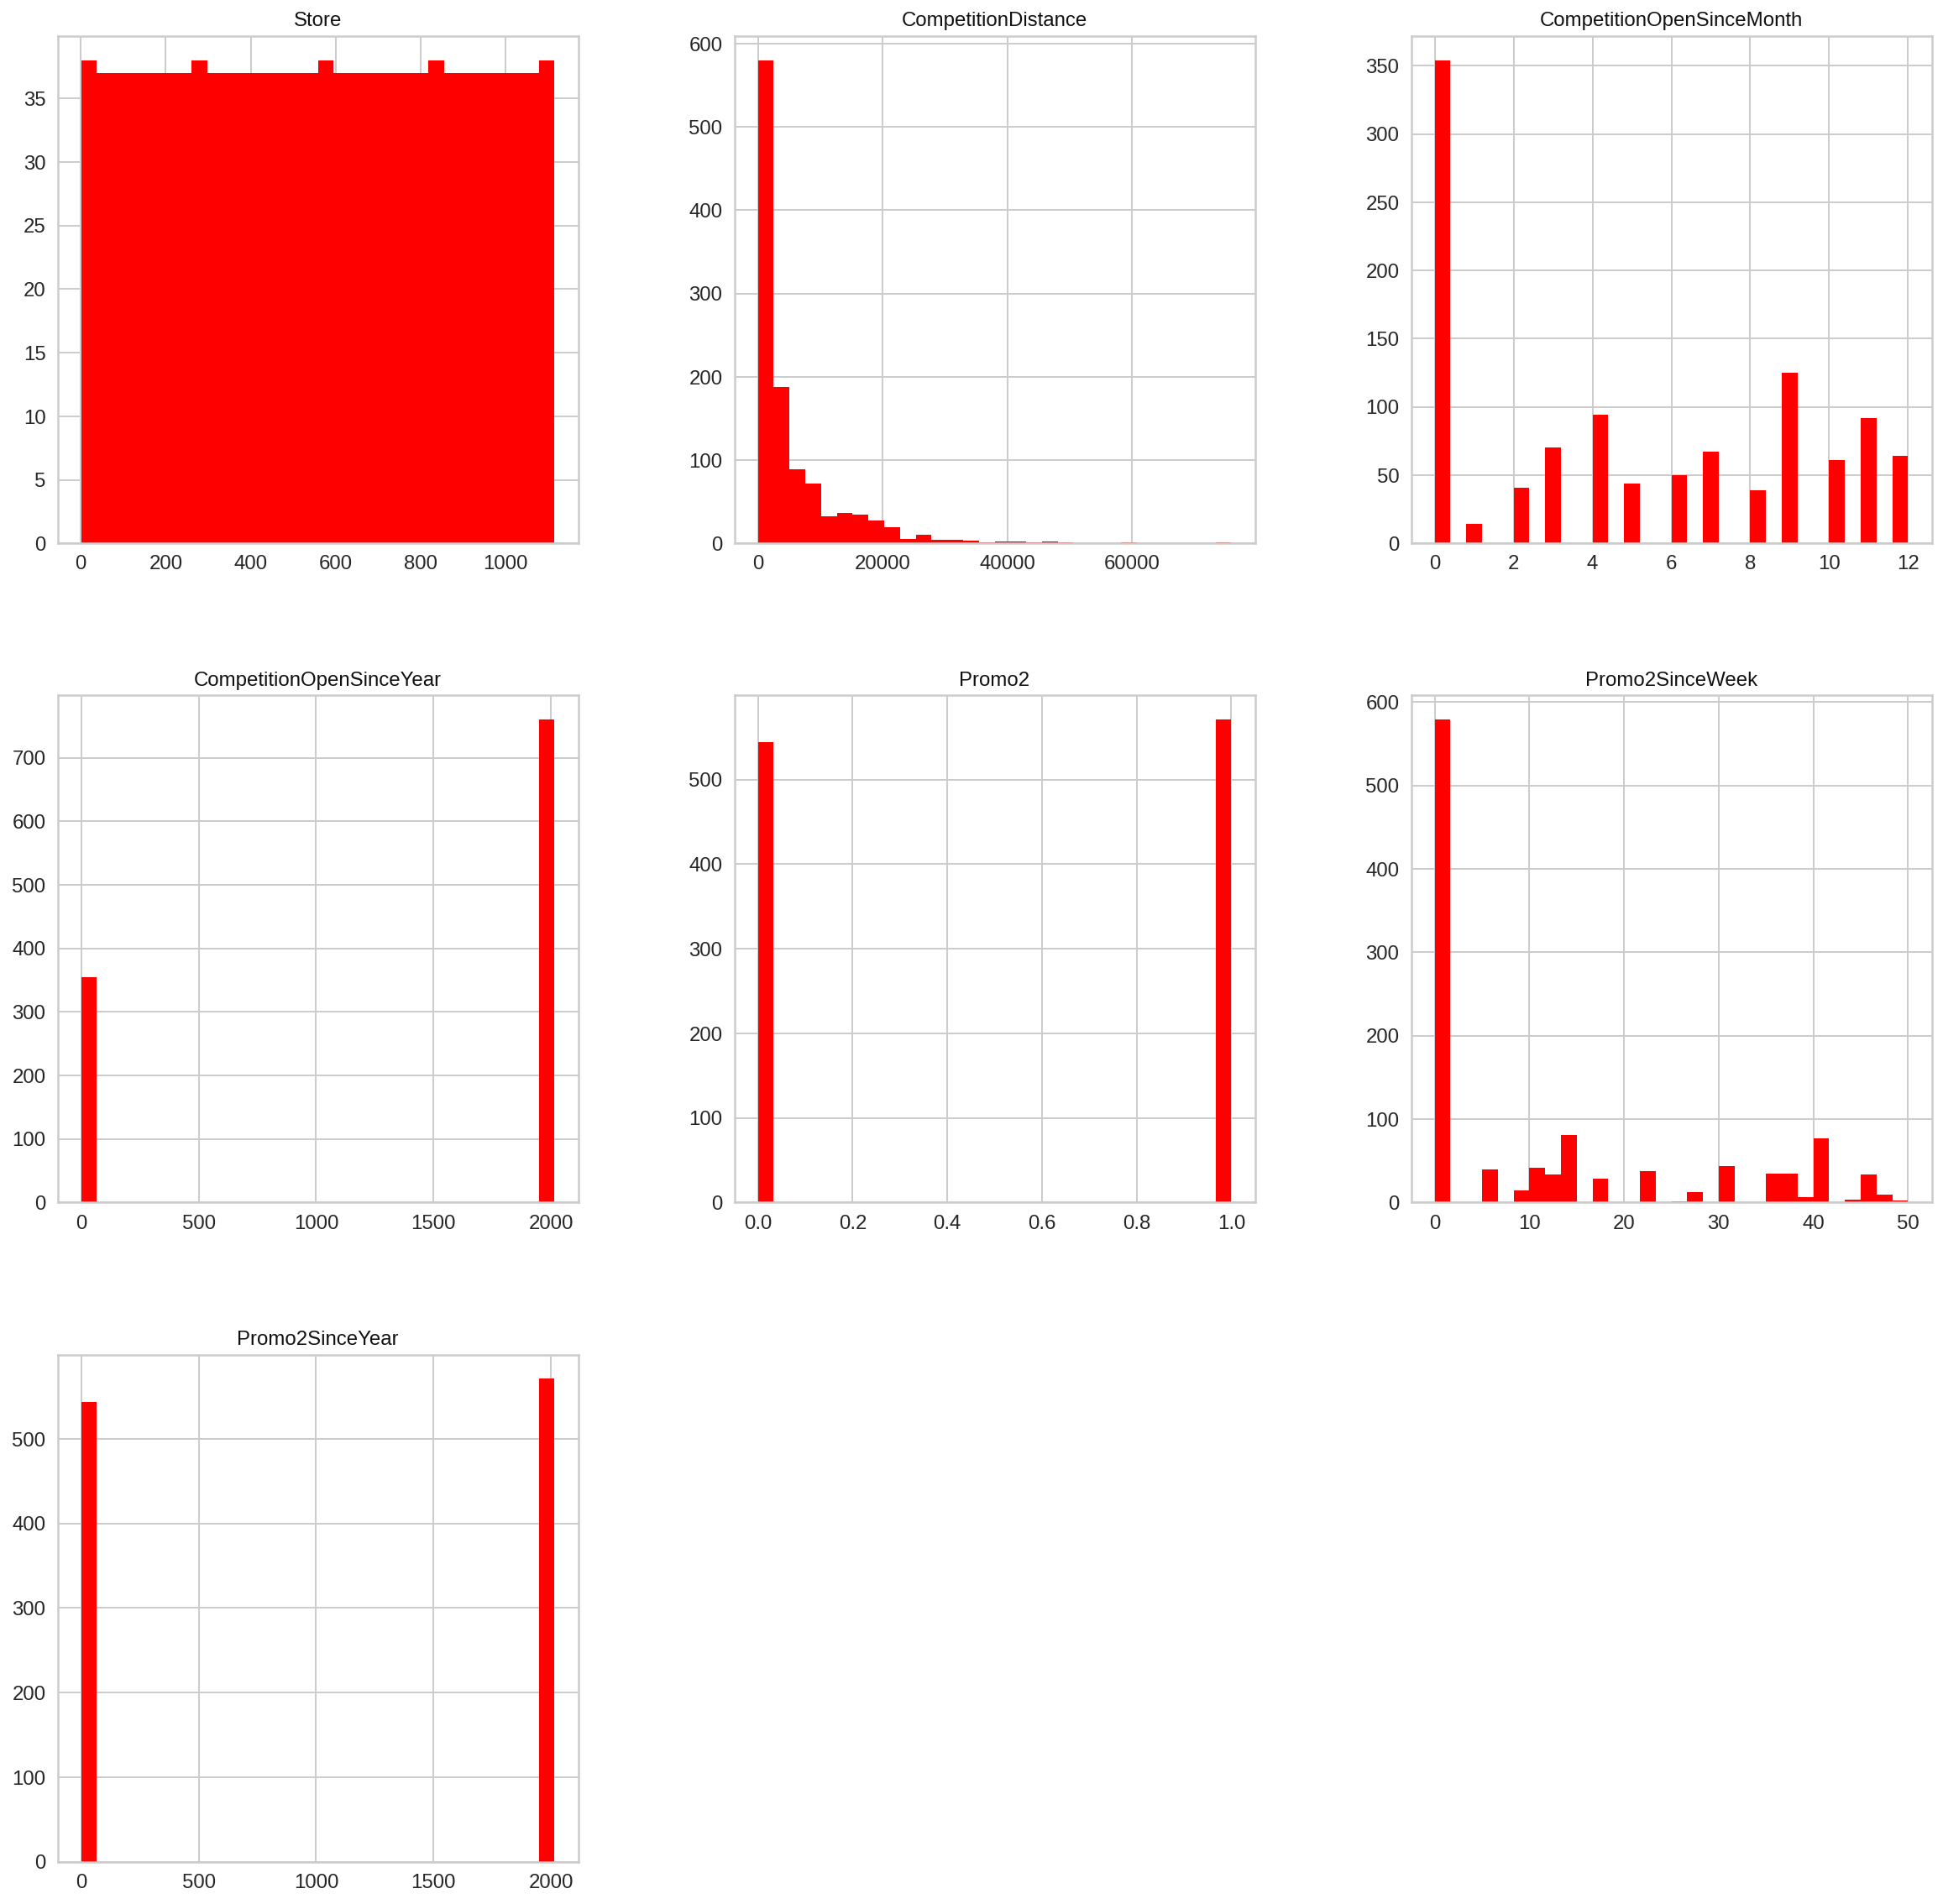

In [ ]:
store.hist(bins = 30,figsize=(20,20),color='red')

# Merge the information form store into train

In [ ]:
df = pd.merge(train,store,how = 'inner',on = 'Store')

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
df.shape

(844392, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Open                       844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   StateHoliday               844392 non-null  object 
 8   SchoolHoliday              844392 non-null  int64  
 9   StoreType                  844392 non-null  object 
 10  Assortment                 844392 non-null  object 
 11  CompetitionDistance        844392 non-null  float64
 12  CompetitionOpenSinceMonth  844392 non-null  float64
 13  CompetitionOpenSinceYear   84

Convert Date to datecolumn and ectract different parts of the **date** 

In [ ]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
split_date(df)
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,27,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,1,0,0,a,...,6.0,2009.0,0,0.0,0.0,0,2013,1,7,2
844388,292,6,2013-01-05,2748,340,1,0,0,0,a,...,6.0,2009.0,0,0.0,0.0,0,2013,1,5,1
844389,292,5,2013-01-04,4202,560,1,0,0,1,a,...,6.0,2009.0,0,0.0,0.0,0,2013,1,4,1
844390,292,4,2013-01-03,4580,662,1,0,0,1,a,...,6.0,2009.0,0,0.0,0.0,0,2013,1,3,1


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


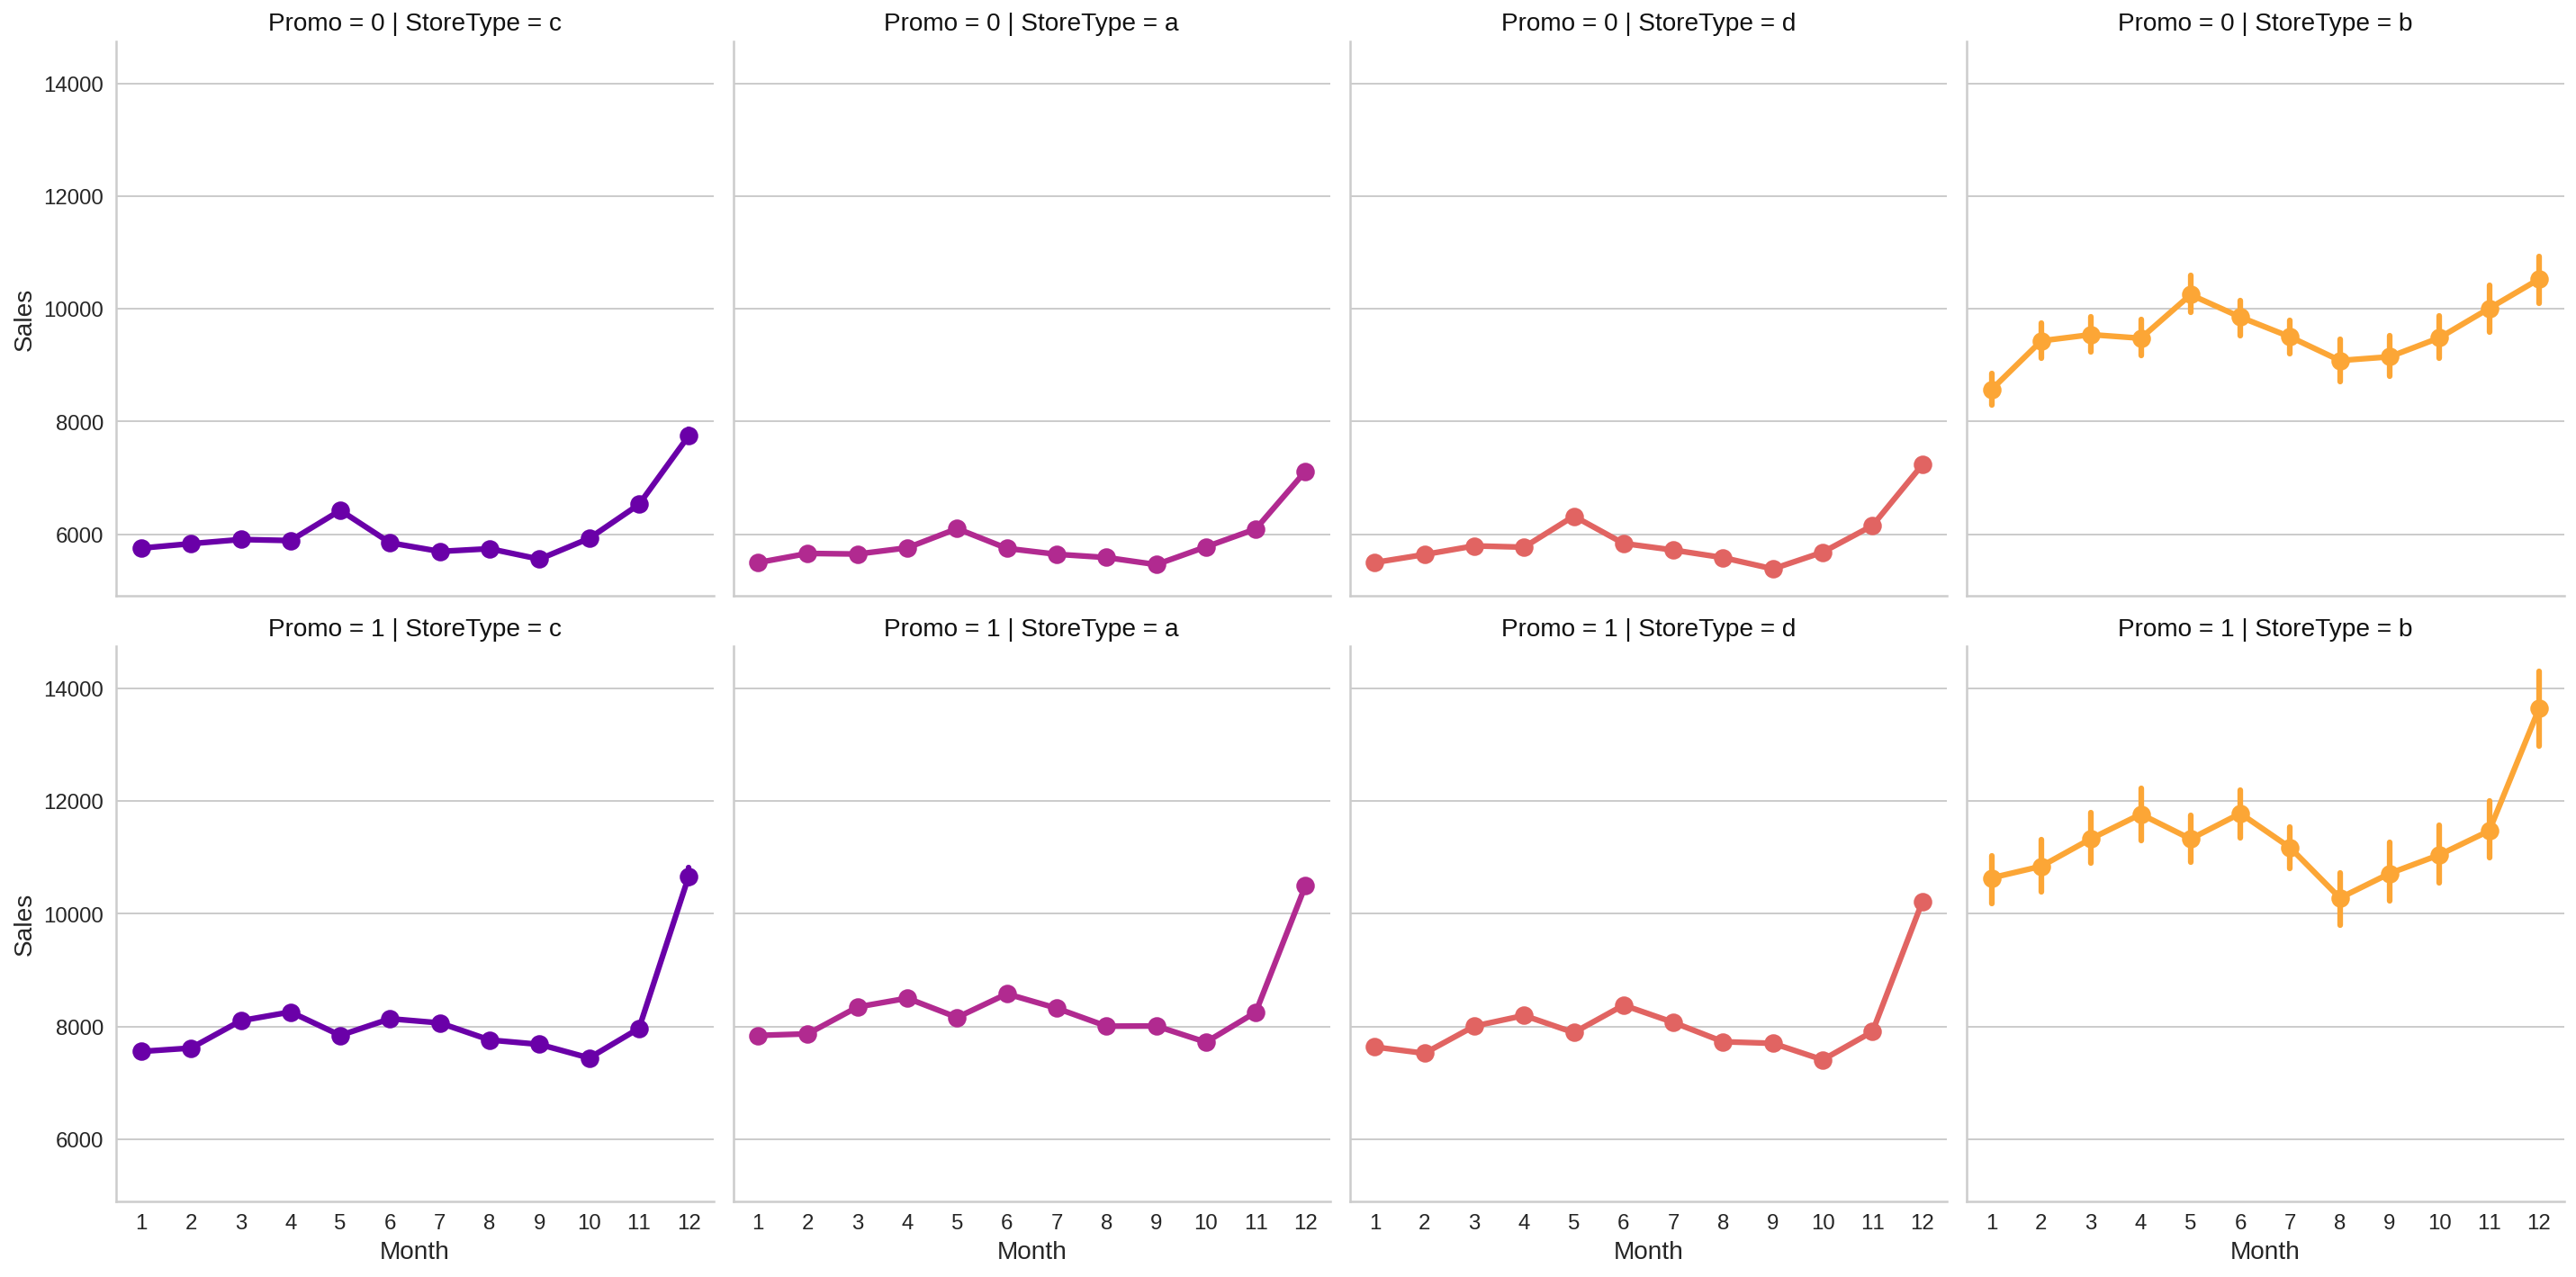

In [ ]:
sns.factorplot(x='Month',y='Sales',data=df, col='StoreType', palette='plasma', hue='StoreType', row='Promo', color='c')

In [ ]:
correlation = df.corr()['Sales'].sort_values()
correlation

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
Day                         -0.051849
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
Year                         0.036169
SchoolHoliday                0.038617
Month                        0.073600
WeekOfYear                   0.074472
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Open                              NaN
Name: Sales, dtype: float64

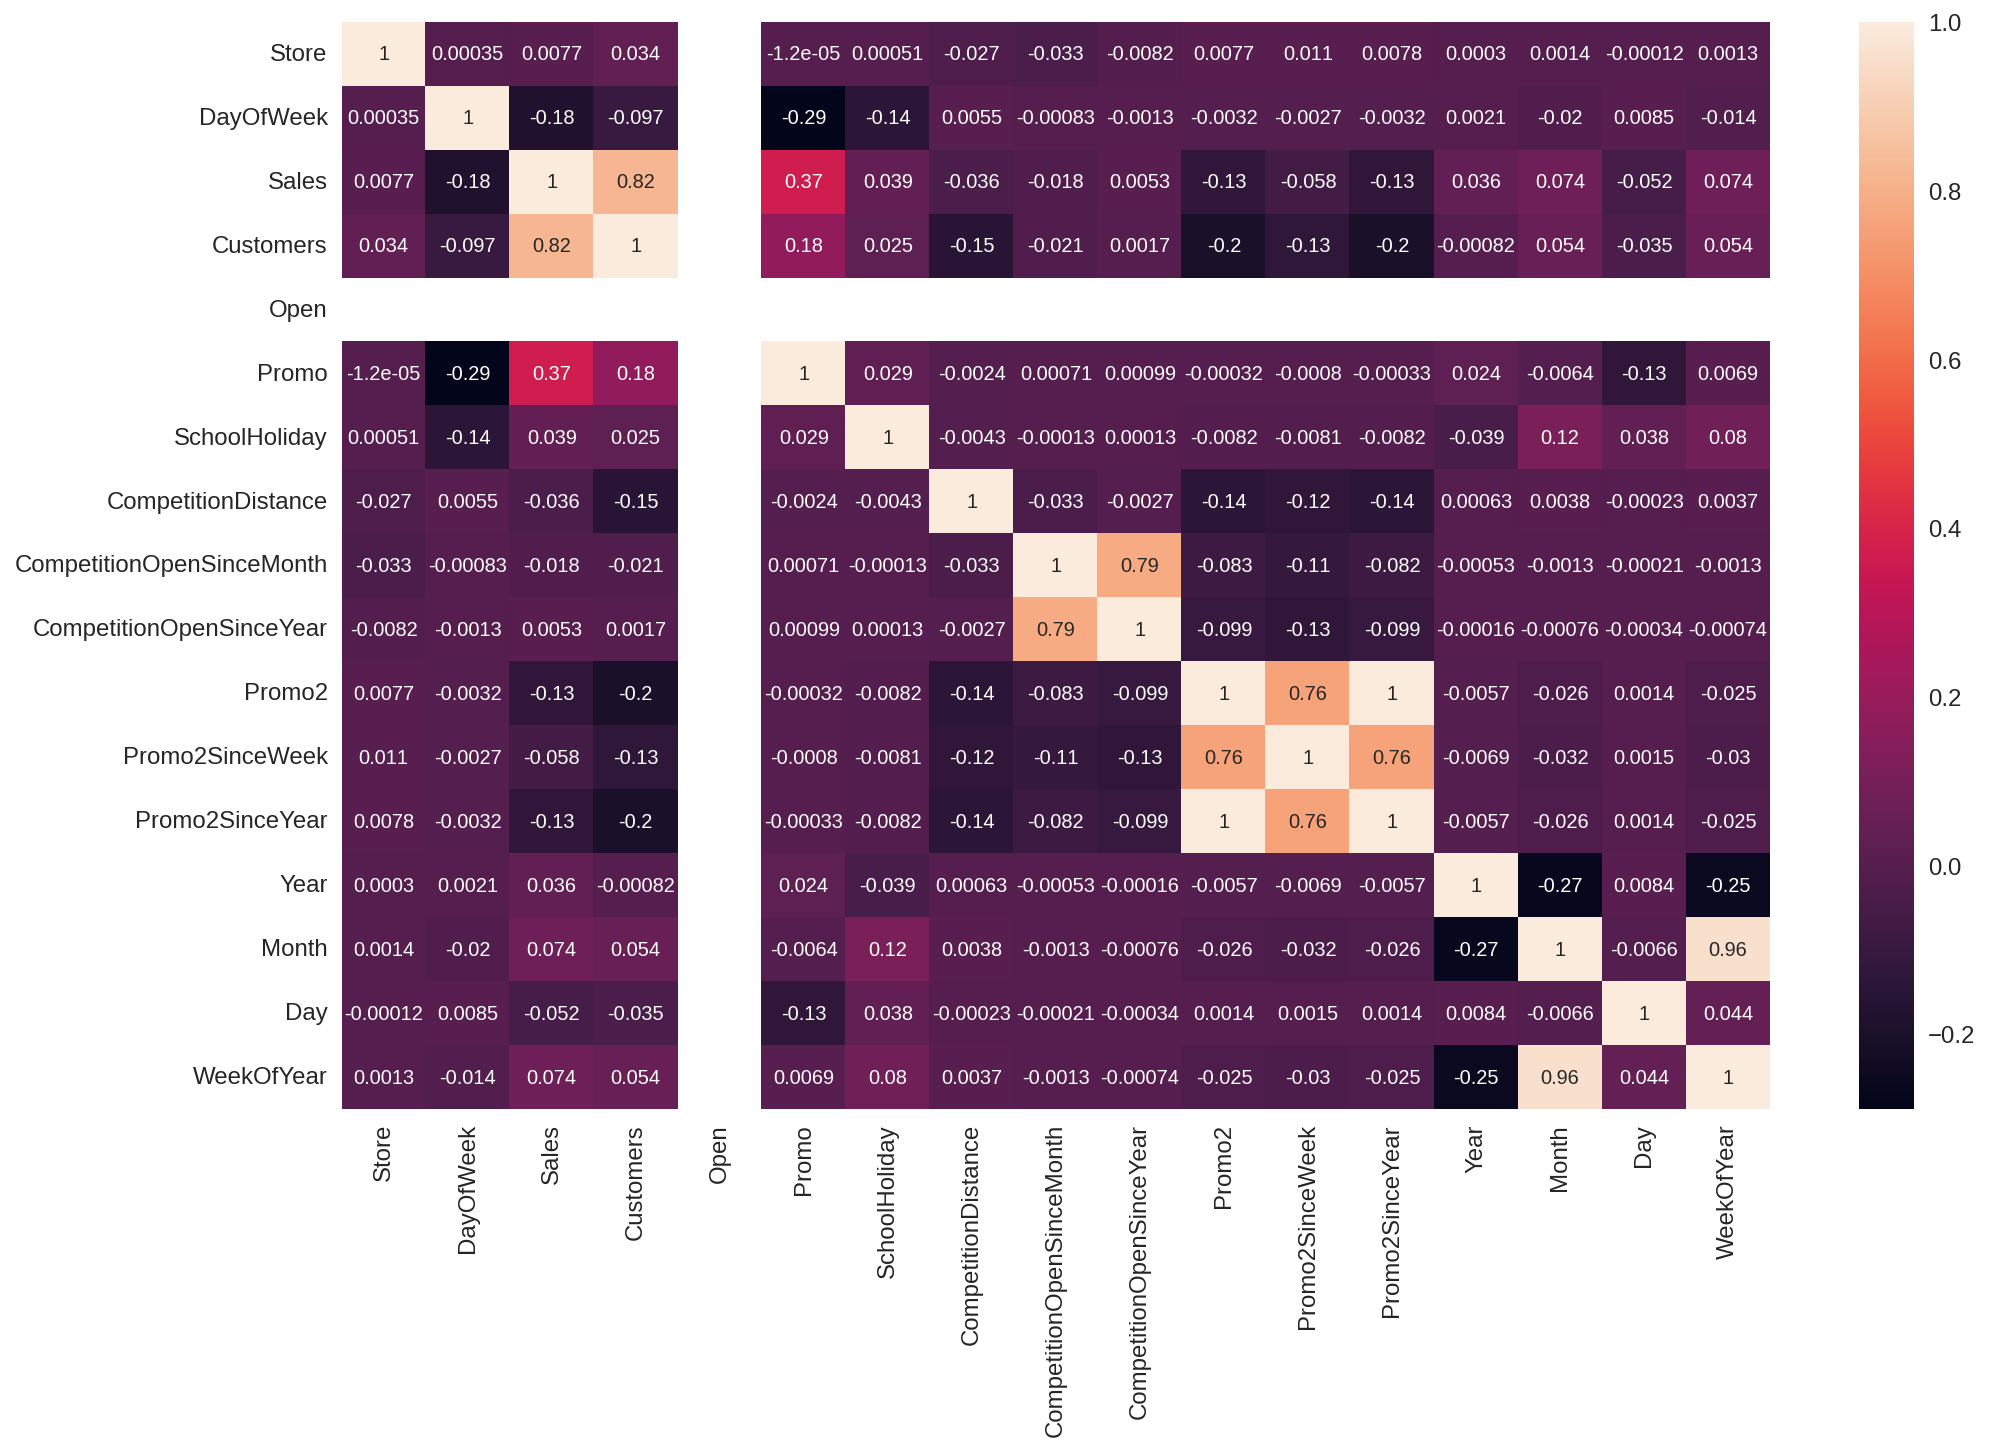

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlations, annot = True);

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,27,31


<Figure size 432x288 with 0 Axes>

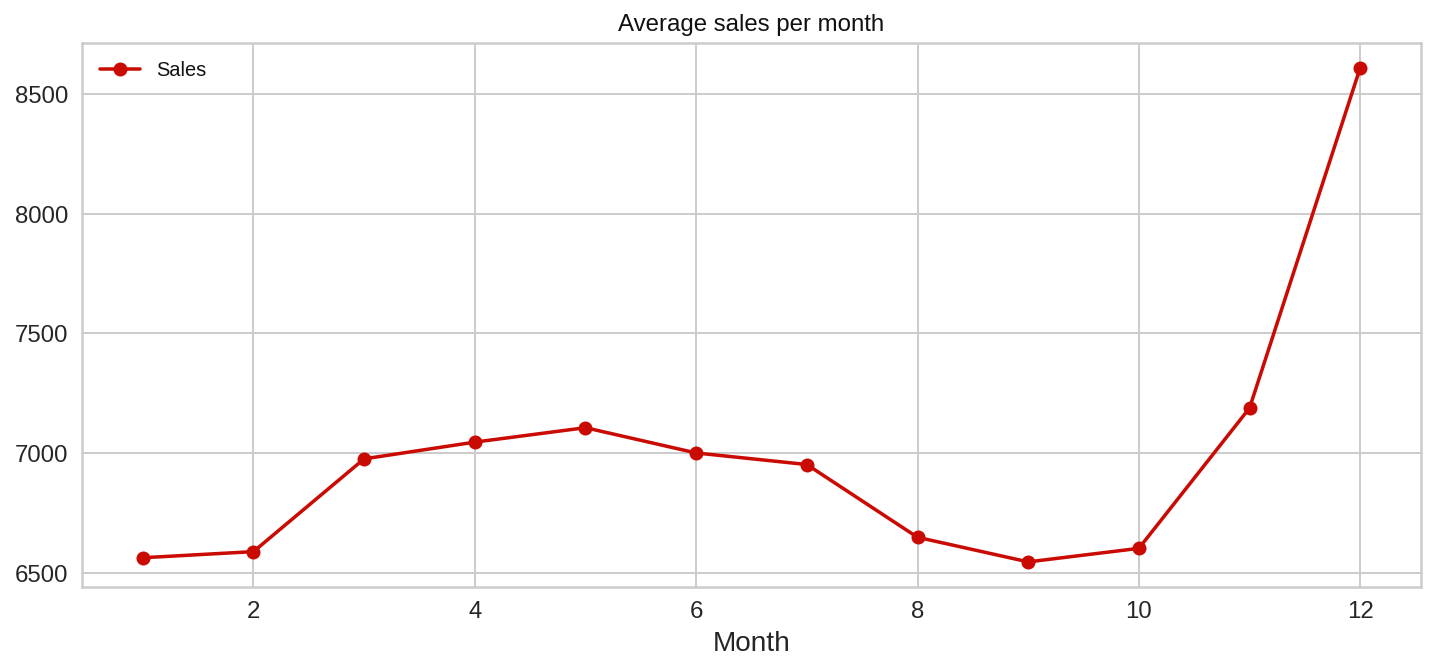

<Figure size 432x288 with 0 Axes>

In [ ]:
axis = df.groupby('Month')[['Sales']].mean().plot(figsize = (12,5),color = 'r' , marker = 'o')
axis.set_title('Average sales per month')
plt.figure()

<Figure size 432x288 with 0 Axes>

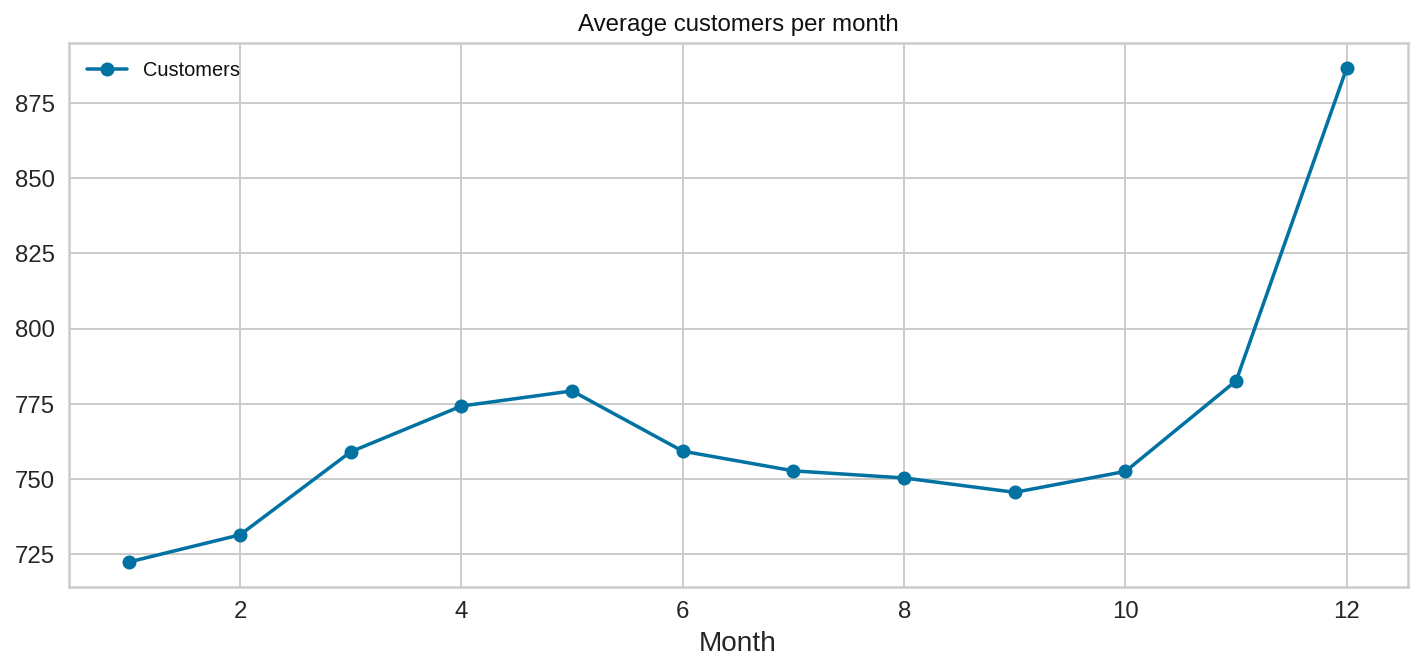

<Figure size 432x288 with 0 Axes>

In [ ]:
axis = df.groupby('Month')[['Customers']].mean().plot(figsize = (12,5),color = 'b' , marker = 'o')
axis.set_title('Average customers per month')
plt.figure()

<Figure size 432x288 with 0 Axes>

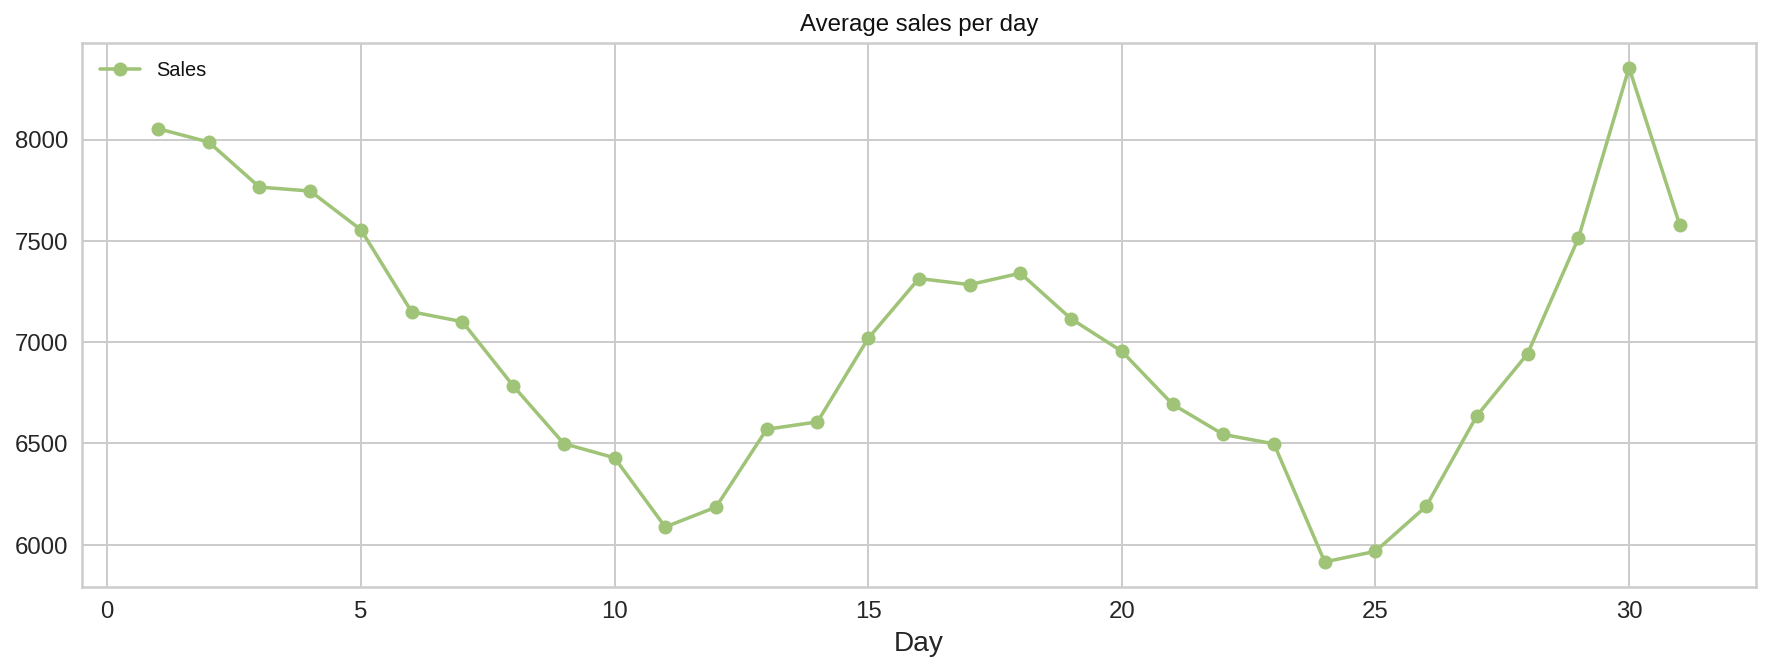

<Figure size 432x288 with 0 Axes>

In [ ]:
axis = df.groupby('Day')[['Sales']].mean().plot(figsize = (15,5),color = 'g' , marker = 'o')
axis.set_title('Average sales per day')
plt.figure()

<Figure size 432x288 with 0 Axes>

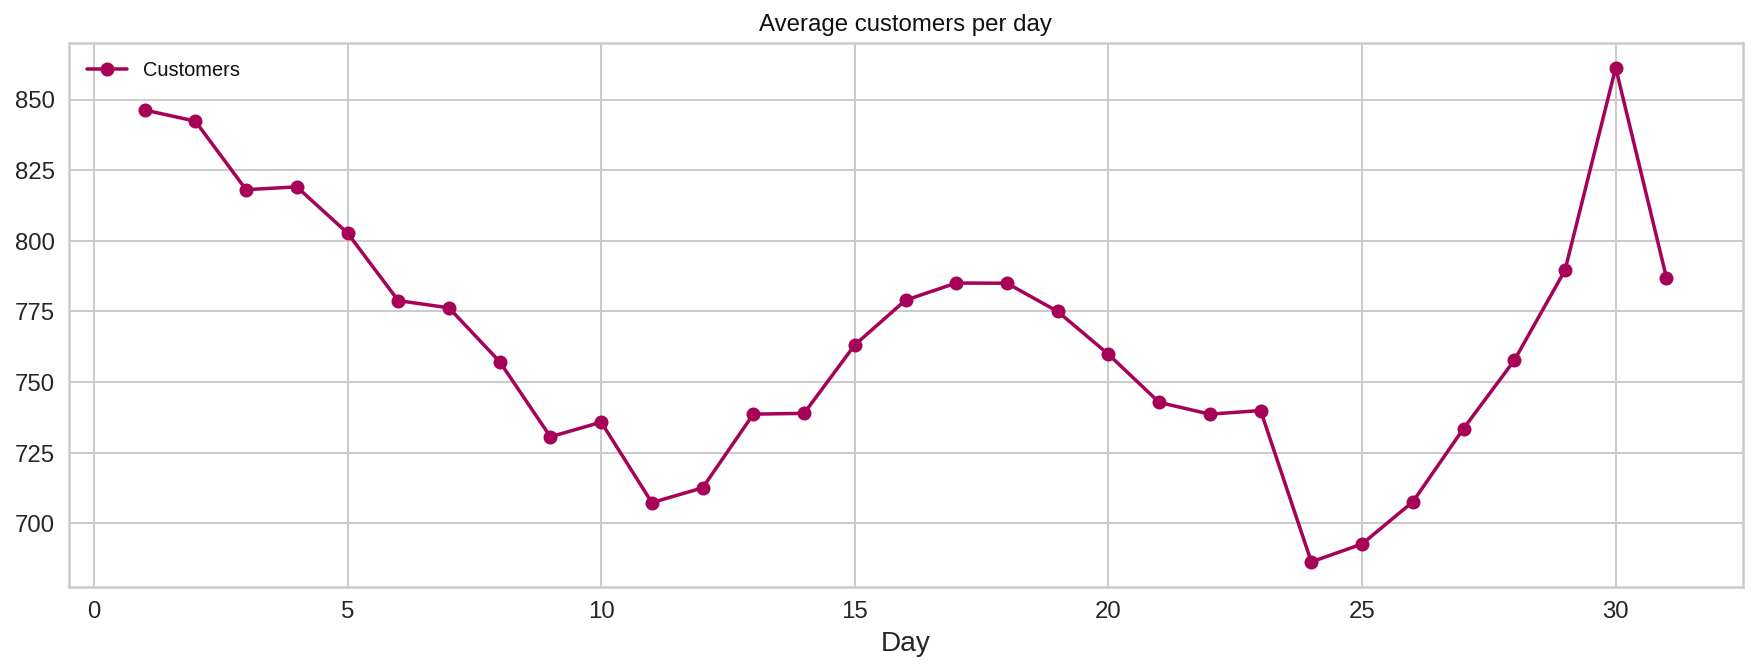

<Figure size 432x288 with 0 Axes>

In [ ]:
axis = df.groupby('Day')[['Customers']].mean().plot(figsize = (15,5),color = 'm' , marker = 'o')
axis.set_title('Average customers per day')
plt.figure()

<Figure size 432x288 with 0 Axes>

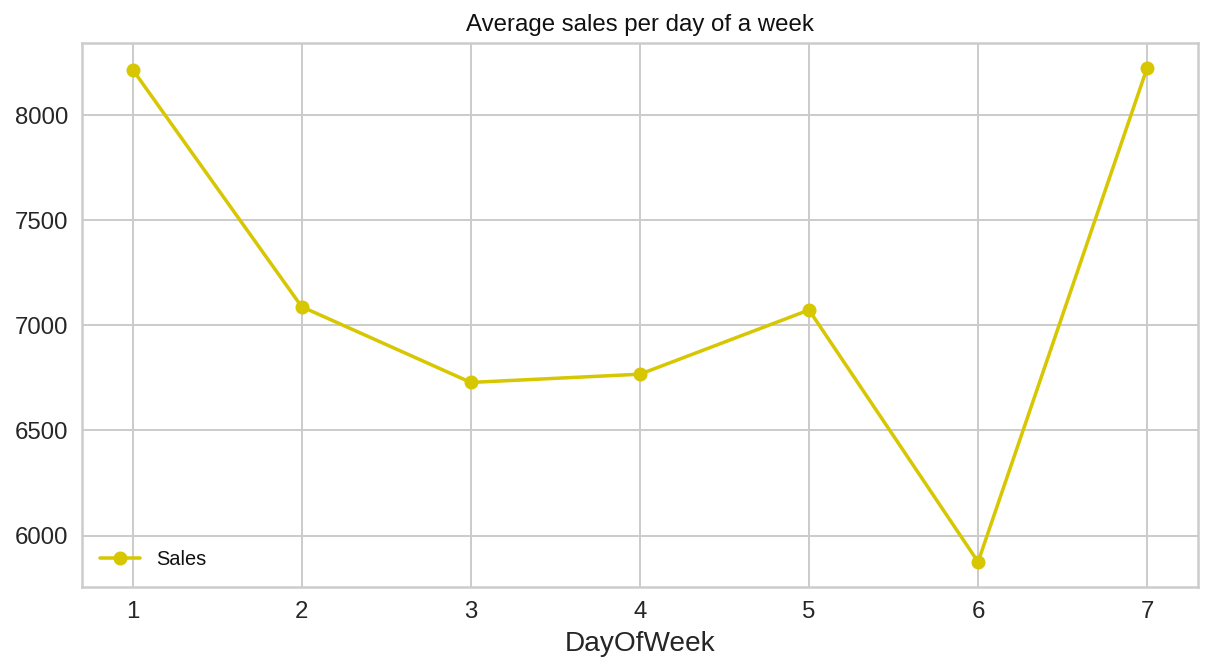

<Figure size 432x288 with 0 Axes>

In [ ]:
axis = df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5),color = 'y' , marker = 'o')
axis.set_title('Average sales per day of a week')
plt.figure()

<Figure size 432x288 with 0 Axes>

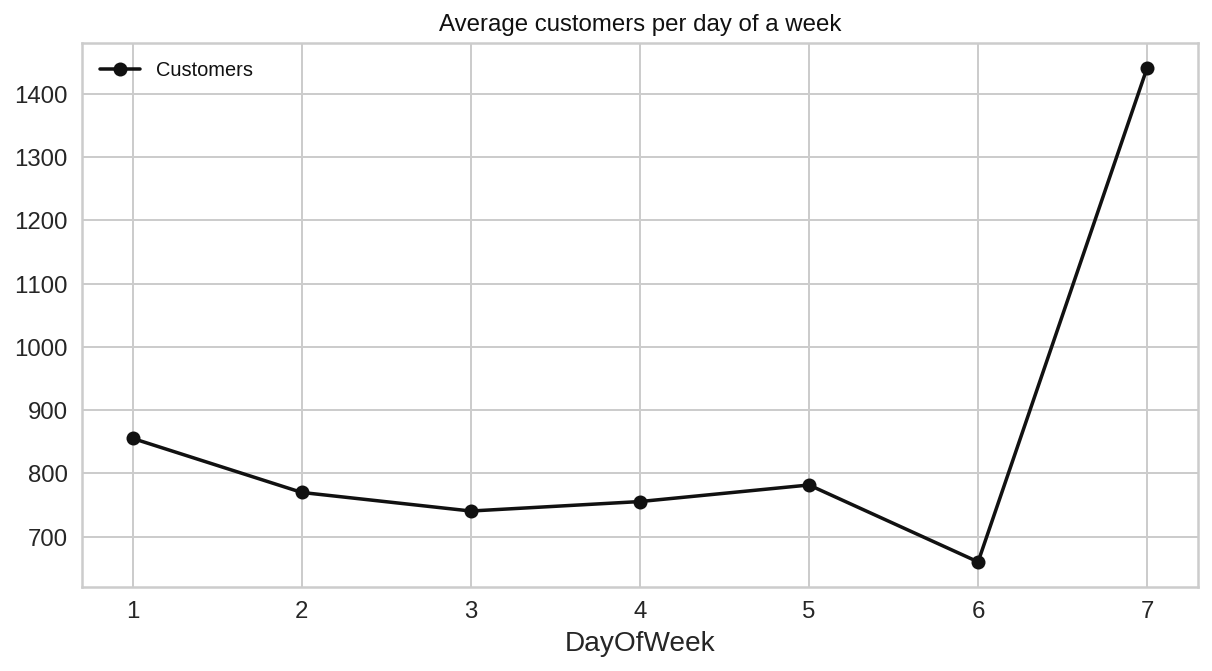

<Figure size 432x288 with 0 Axes>

In [ ]:
axis = df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5),color = 'k' , marker = 'o')
axis.set_title('Average customers per day of a week')
plt.figure()

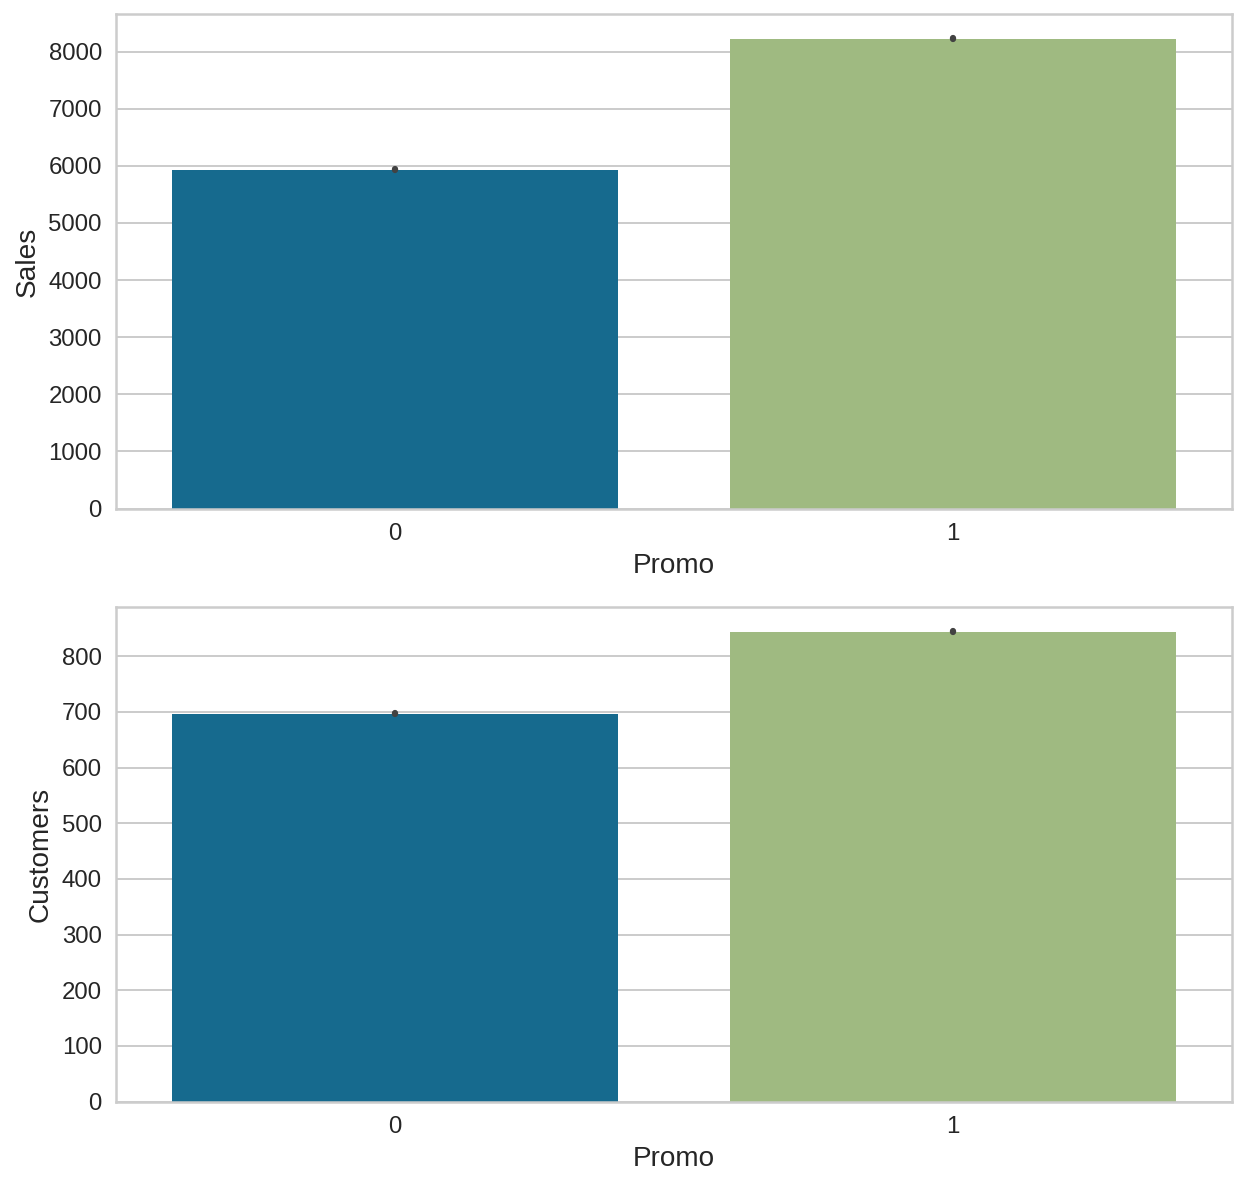

In [ ]:
plt.figure(figsize = (10,10))

plt.subplot(211)
sns.barplot(x = 'Promo' , y = 'Sales' , data = df)
plt.subplot(212)
sns.barplot(x = 'Promo' , y = 'Customers' , data = df)

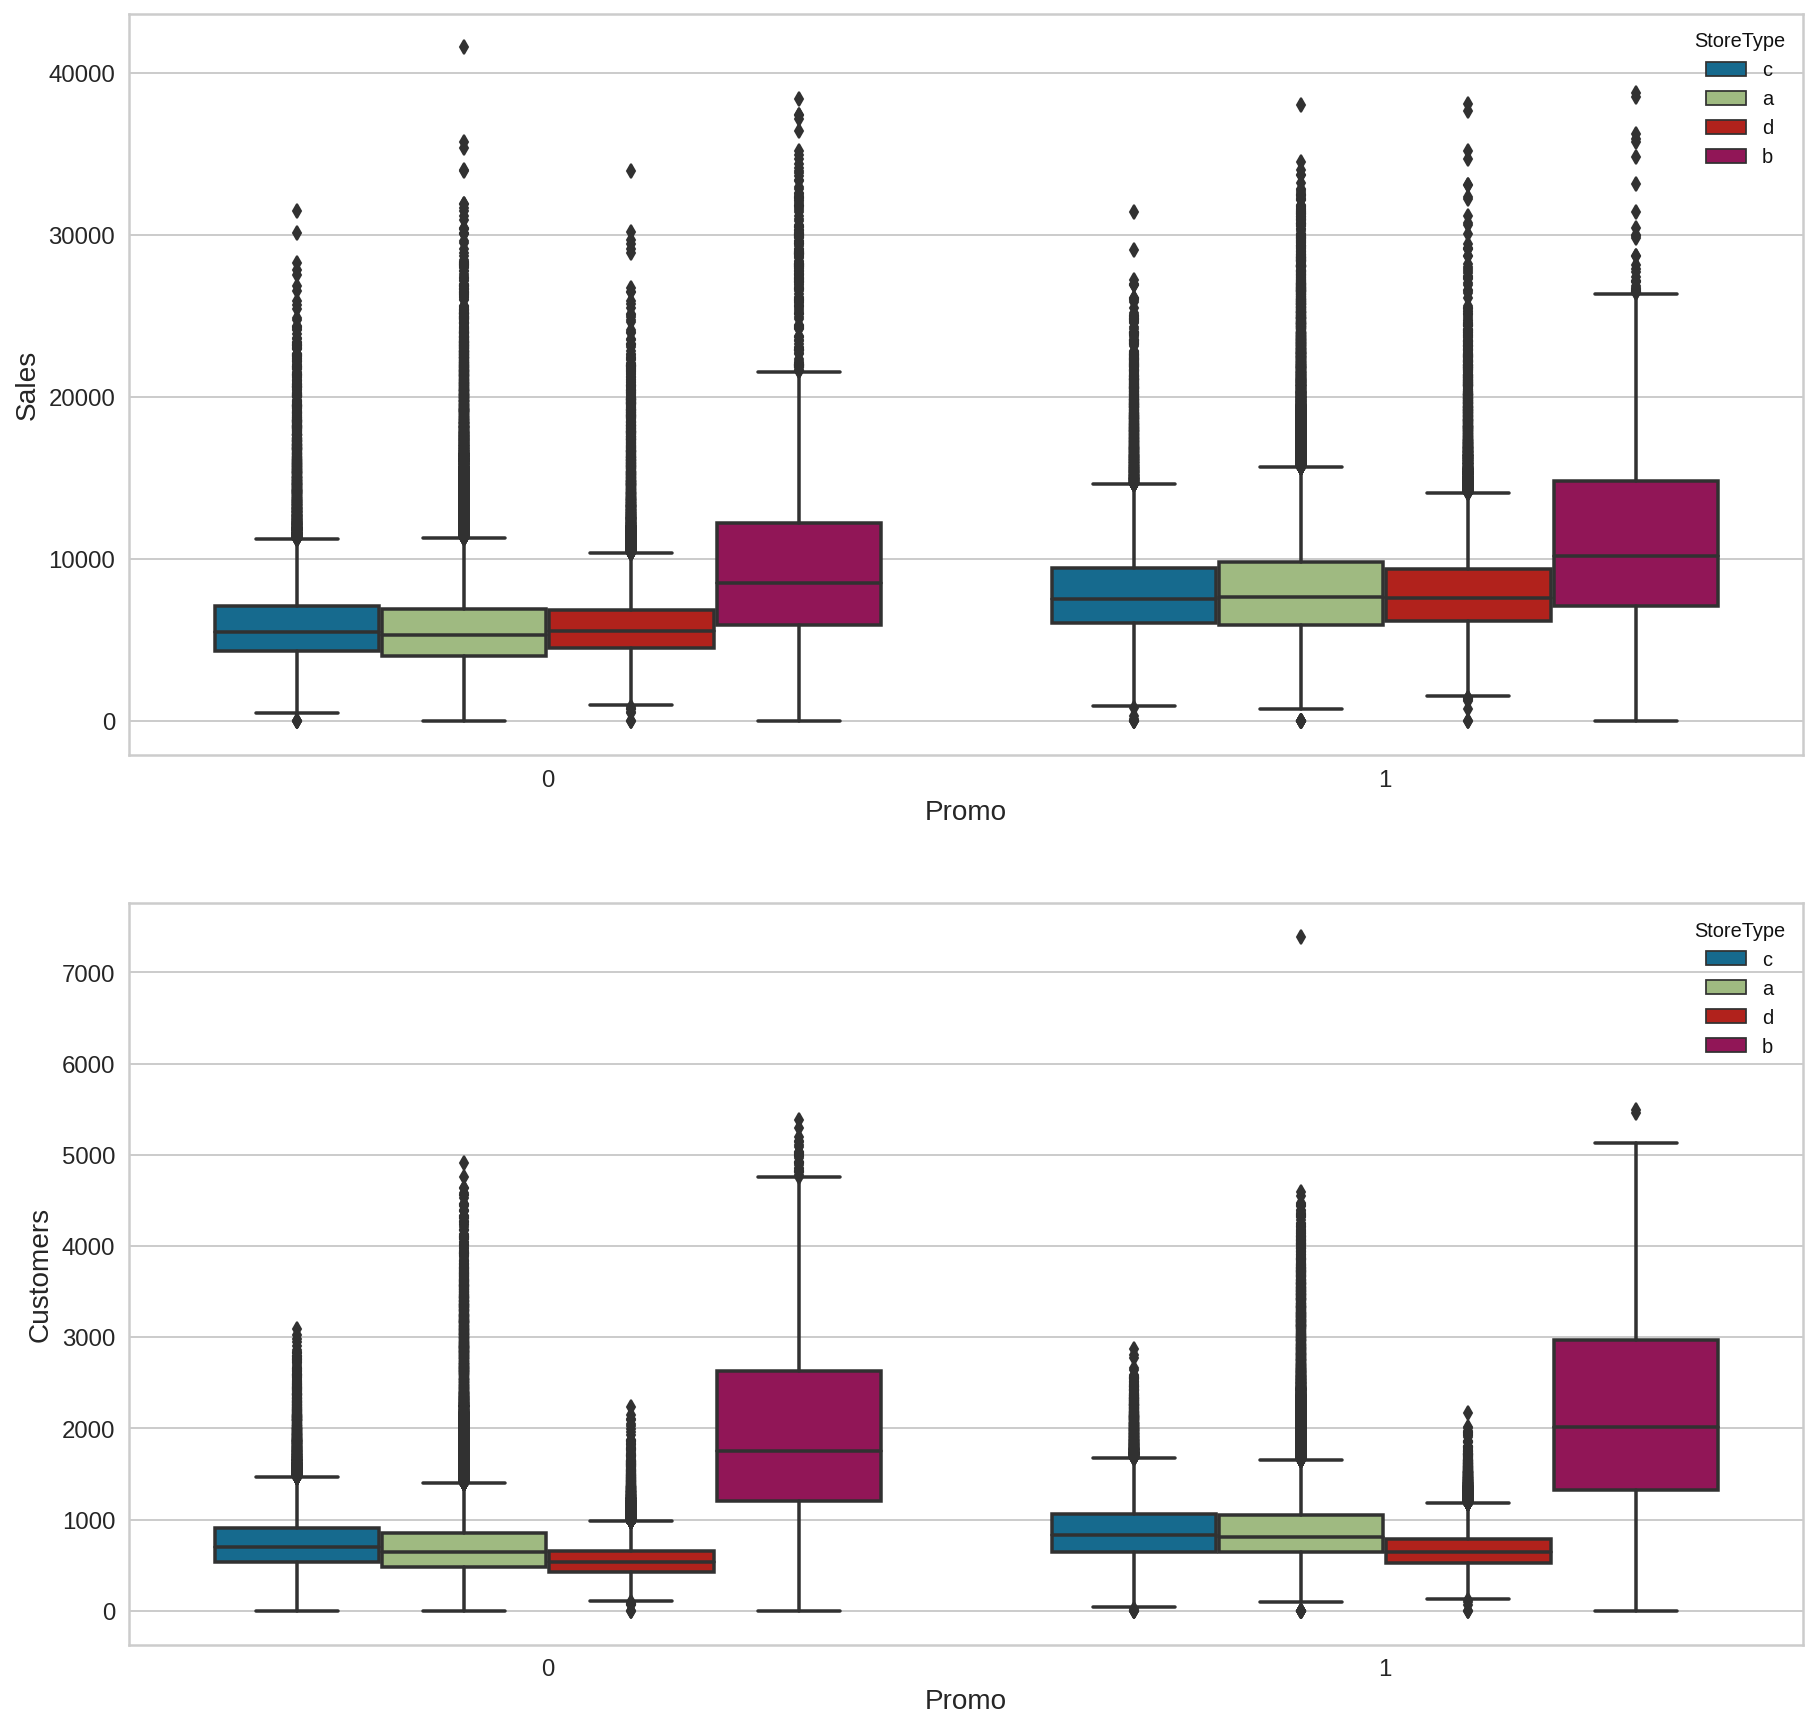

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(211)
sns.boxplot(x = 'Promo' , y = 'Sales' ,hue = 'StoreType' ,data = df)
plt.subplot(212)
sns.boxplot(x = 'Promo' , y = 'Customers' ,hue = 'StoreType' ,data = df)

**Forcasting using Facebook prophet**

In [ ]:
!pip install fbprophet
from fbprophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def sales_prediction(store_id,sales_df,periods):
    sales_df = sales_df[sales_df['Store']==store_id]
    sales_df = sales_df[['Date','Sales']].rename(columns = {'Date':'ds','Sales':'y'})
    sales_df = sales_df.sort_values('ds')
    
    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.plot(forecast , xlabel = 'Date',ylabel='Sales')
    figure2 = model.plot_components(forecast)
    return sales_df, forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


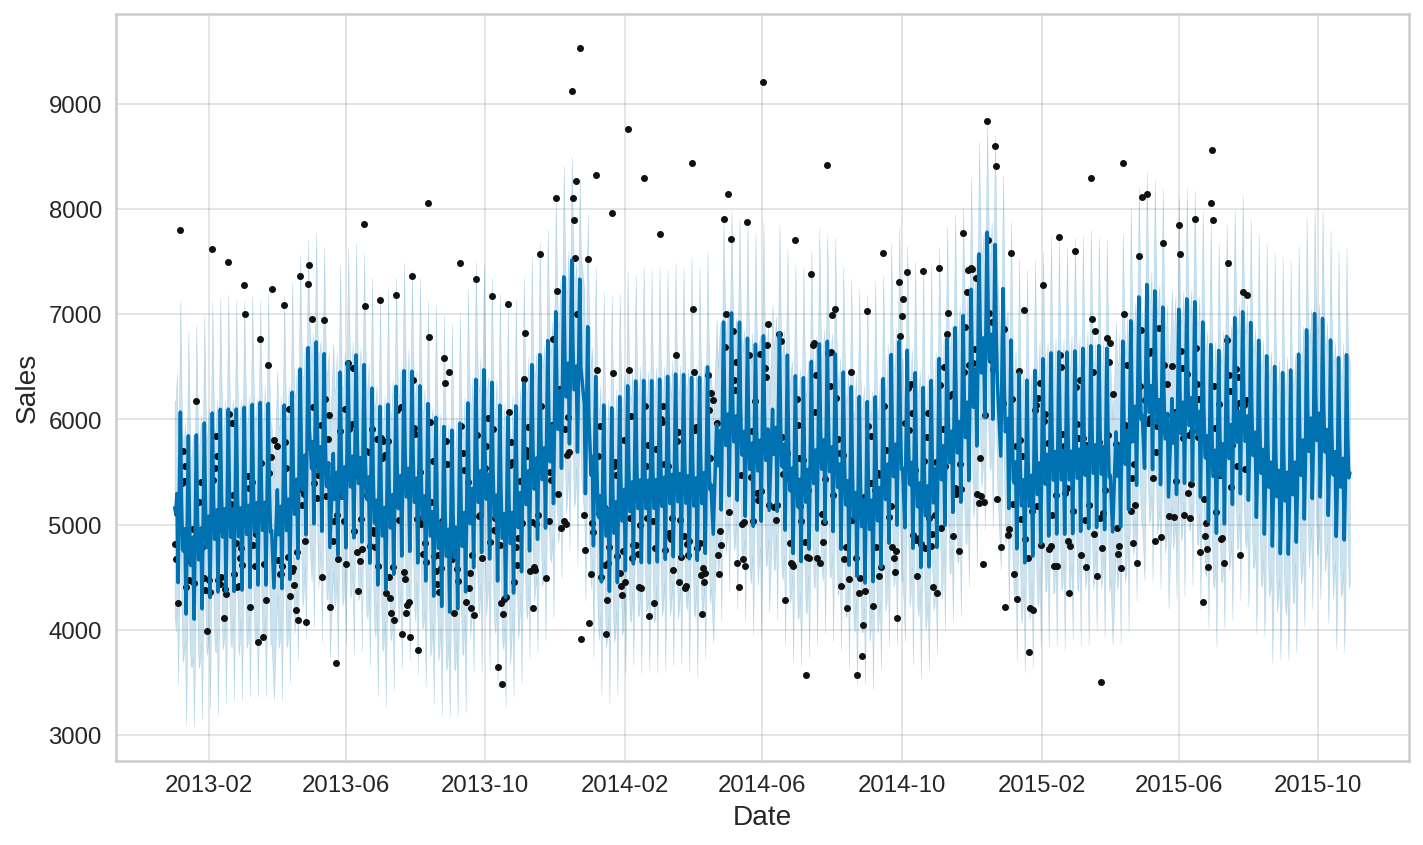

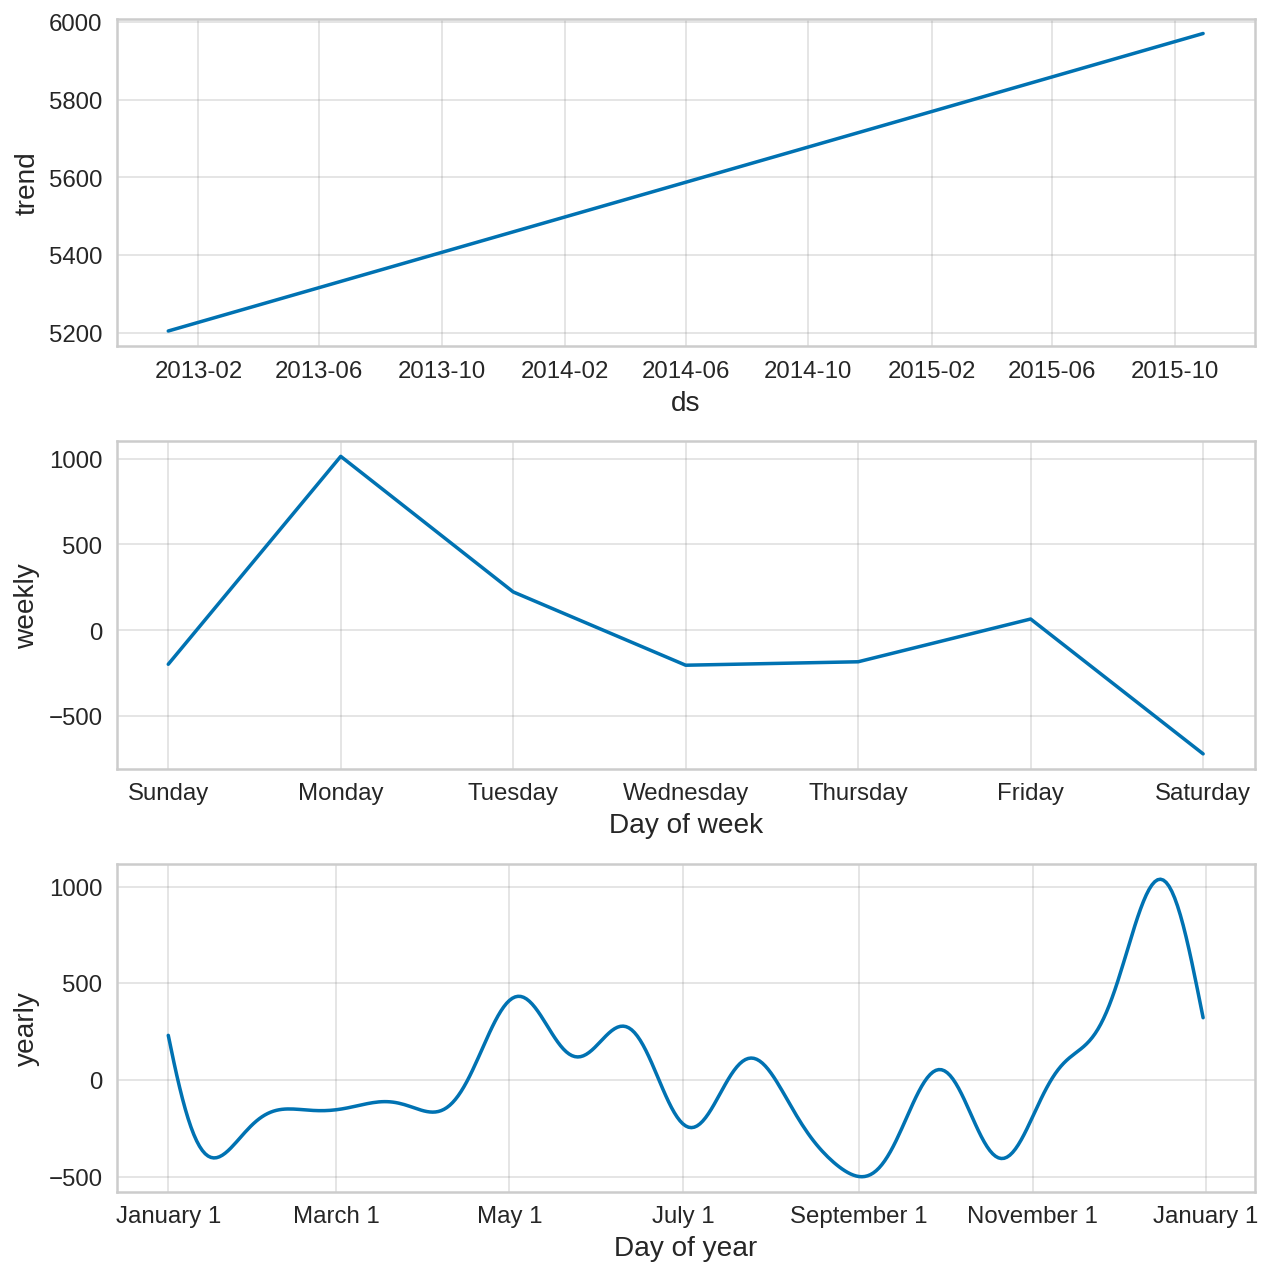

In [ ]:
df_origin, df_prediction = sales_prediction(10, df, 90)

In [ ]:
df_origin.shape, df_prediction.shape

((784, 2), (874, 19))

In [ ]:
df_prediction.head(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5204.484727,4120.603679,6174.328812,5204.484727,5204.484727,-44.077962,-44.077962,-44.077962,-203.046067,-203.046067,-203.046067,158.968105,158.968105,158.968105,0.0,0.0,0.0,5160.406765
1,2013-01-03,5205.228405,3983.701908,6184.738214,5205.228405,5205.228405,-93.232653,-93.232653,-93.232653,-183.012971,-183.012971,-183.012971,89.780317,89.780317,89.780317,0.0,0.0,0.0,5111.995752
2,2013-01-04,5205.972083,4256.521539,6441.190182,5205.972083,5205.972083,89.471792,89.471792,89.471792,65.942825,65.942825,65.942825,23.528967,23.528967,23.528967,0.0,0.0,0.0,5295.443875
3,2013-01-05,5206.715761,3478.970291,5505.880811,5206.715761,5206.715761,-758.331393,-758.331393,-758.331393,-719.174286,-719.174286,-719.174286,-39.157107,-39.157107,-39.157107,0.0,0.0,0.0,4448.384368
4,2013-01-07,5208.203117,4987.606021,7133.928625,5208.203117,5208.203117,861.318599,861.318599,861.318599,1013.040634,1013.040634,1013.040634,-151.722034,-151.722034,-151.722034,0.0,0.0,0.0,6069.521716
5,2013-01-08,5208.946795,4183.013689,6281.812990,5208.946795,5208.946795,22.907926,22.907926,22.907926,223.673781,223.673781,223.673781,-200.765855,-200.765855,-200.765855,0.0,0.0,0.0,5231.854721
6,2013-01-09,5209.690473,3687.926862,5829.522416,5209.690473,5209.690473,-447.628120,-447.628120,-447.628120,-203.046067,-203.046067,-203.046067,-244.582053,-244.582053,-244.582053,0.0,0.0,0.0,4762.062352
7,2013-01-10,5210.434151,3761.791896,5793.170839,5210.434151,5210.434151,-466.000542,-466.000542,-466.000542,-183.012971,-183.012971,-183.012971,-282.987572,-282.987572,-282.987572,0.0,0.0,0.0,4744.433608
8,2013-01-11,5211.177828,3894.206603,5977.730901,5211.177828,5211.177828,-249.950178,-249.950178,-249.950178,65.942825,65.942825,65.942825,-315.893003,-315.893003,-315.893003,0.0,0.0,0.0,4961.227650
9,2013-01-12,5211.921506,3089.946234,5131.302909,5211.921506,5211.921506,-1062.473832,-1062.473832,-1062.473832,-719.174286,-719.174286,-719.174286,-343.299546,-343.299546,-343.299546,0.0,0.0,0.0,4149.447675


In [ ]:
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
814,2015-08-31,5927.083952,5331.778720,7545.755209,5927.083436,5927.084457,518.033551,518.033551,518.033551,1013.040634,1013.040634,1013.040634,-495.007082,-495.007082,-495.007082,0.0,0.0,0.0,6445.117503
815,2015-09-01,5927.828273,4552.426912,6764.633492,5927.827719,5927.828806,-275.037379,-275.037379,-275.037379,223.673781,223.673781,223.673781,-498.711160,-498.711160,-498.711160,0.0,0.0,0.0,5652.790894
816,2015-09-02,5928.572594,4233.234947,6247.163368,5928.571989,5928.573162,-703.616061,-703.616061,-703.616061,-203.046067,-203.046067,-203.046067,-500.569994,-500.569994,-500.569994,0.0,0.0,0.0,5224.956533
817,2015-09-03,5929.316915,4141.566923,6288.517567,5929.316278,5929.317513,-683.400141,-683.400141,-683.400141,-183.012971,-183.012971,-183.012971,-500.387170,-500.387170,-500.387170,0.0,0.0,0.0,5245.916774
818,2015-09-04,5930.061236,4406.717001,6598.561441,5930.060560,5930.061864,-432.029582,-432.029582,-432.029582,65.942825,65.942825,65.942825,-497.972407,-497.972407,-497.972407,0.0,0.0,0.0,5498.031655
819,2015-09-05,5930.805557,3716.123115,5799.853668,5930.804855,5930.806212,-1212.324043,-1212.324043,-1212.324043,-719.174286,-719.174286,-719.174286,-493.149757,-493.149757,-493.149757,0.0,0.0,0.0,4718.481515
820,2015-09-06,5931.549878,4209.375122,6293.607223,5931.549128,5931.550550,-683.189865,-683.189865,-683.189865,-197.423916,-197.423916,-197.423916,-485.765949,-485.765949,-485.765949,0.0,0.0,0.0,5248.360014
821,2015-09-07,5932.294200,5491.843076,7511.041711,5932.293422,5932.294909,537.342045,537.342045,537.342045,1013.040634,1013.040634,1013.040634,-475.698589,-475.698589,-475.698589,0.0,0.0,0.0,6469.636244
822,2015-09-08,5933.038521,4630.997133,6628.349793,5933.037704,5933.039271,-239.190150,-239.190150,-239.190150,223.673781,223.673781,223.673781,-462.863931,-462.863931,-462.863931,0.0,0.0,0.0,5693.848370
823,2015-09-09,5933.782842,4255.406425,6319.368167,5933.781996,5933.783622,-650.270011,-650.270011,-650.270011,-203.046067,-203.046067,-203.046067,-447.223944,-447.223944,-447.223944,0.0,0.0,0.0,5283.512830


In [ ]:
df_origin.tail()

,ds,y
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186
7036,2015-07-31,7185
